# Guiding questions

How has the housing crisis progressed in NYC since 1983, as reflected by trends in the number of homeless at shelters every night?

In [12]:
from collections import defaultdict
import pandas as pd
import numpy as np
from numpy import ma
import matplotlib.pyplot as plt
from tika import parser 
from multiprocessing import Pool
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib

In [13]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


%matplotlib inline
file = '../data/NYC_Homeless_Shelter_Population.pdf'
# Parse data from file
file_data = parser.from_file(file)
# Get files text content
text = file_data['content']
# print(text) formatting is incorrect

2019-04-23 10:29:12,954 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [14]:
df = pd.read_csv(
    '../data/NYC_Homeless_Shelter_Population.csv', 
thousands=',',
    header=10, 
    engine='python', # default pandas engine does not support skipfooter
    index_col=False, # don't use first column (year) as dataframe index
    names = ['Date', 'Total Population', 'Total Families','Total Persons in Families', 'Children', 'Adults in Families', 
            'Single Adults', 'Single Men', 'Single Women', 'Average Length of Shelter Stays for Families (in Days)']
)

#print(df)
#printing nan for empty data point (data not available)
#want just Total Population
df.head()

,Date,Total Population,Total Families,Total Persons in Families,Children,Adults in Families,Single Adults,Single Men,Single Women,Average Length of Shelter Stays for Families (in Days)
0,Jan-83,NaN,NaN,NaN,NaN,NaN,4509,3975,534,NaN
1,Feb-83,NaN,1520.0,NaN,NaN,NaN,4850,4274,576,NaN
2,Mar-83,NaN,1655.0,NaN,NaN,NaN,4991,4413,578,NaN
3,Apr-83,NaN,1761.0,NaN,NaN,NaN,5123,4543,580,NaN
4,May-83,NaN,1839.0,NaN,NaN,NaN,5080,4489,591,NaN


In [15]:
# Format: { year: { field: { sex : count } } }
#counts = defaultdict(lambda: defaultdict(dict))

date = df['Date']
pop = df['Total Population']
total_pop = dict(zip(date, pop))
#total_pop

#print(date)


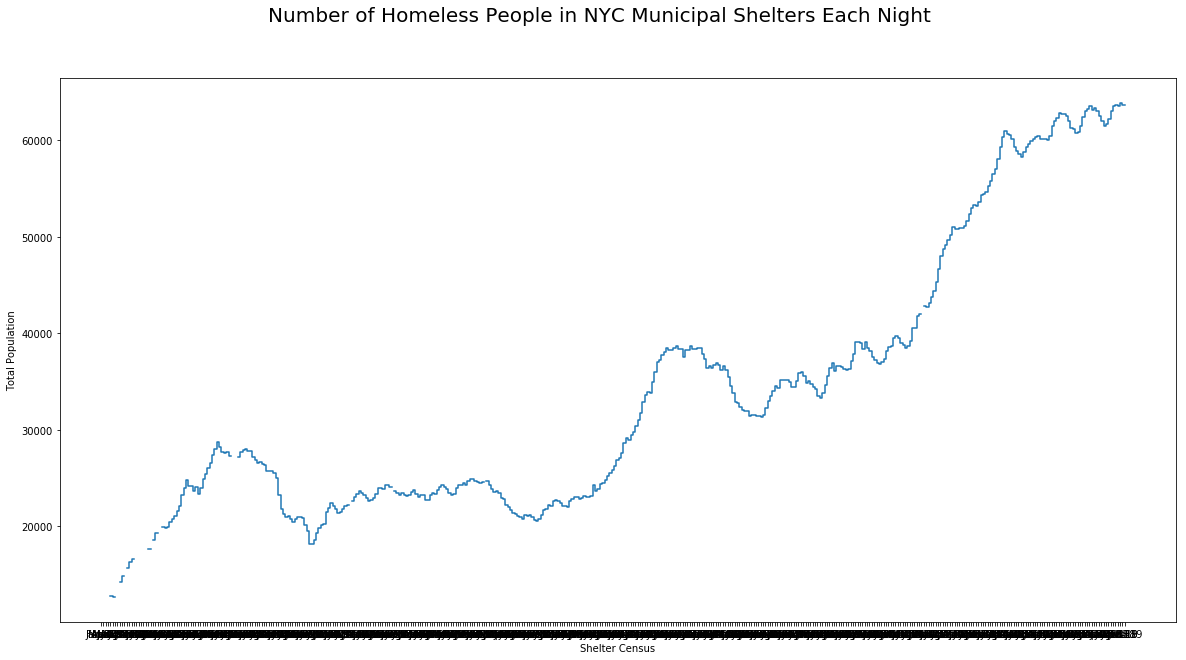

In [16]:
#plt.plot(df['Date'], df['Total Population'])
x = date
y = pop

fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Number of Homeless People in NYC Municipal Shelters Each Night', 
            fontsize = 20)

plt.xlabel('Shelter Census')
plt.ylabel('Total Population')


plt.step(x, y)

#export to pdf
plt.savefig("shelters-graphic.pdf", transparent = True)


plt.show()

In [32]:
df = pd.read_csv(
    '../data/NYC_Homeless_Shelter_Population.csv', 
    thousands=',',
    header=10, 
    engine='python', # default pandas engine does not support skipfooter
    index_col=False, # don't use first column (year) as dataframe index
    names = ['Date', 'Total Population', 'Total Families','Total Persons in Families', 'Children', 'Adults in Families', 
            'Single Adults', 'Single Men', 'Single Women', 'Average Length of Shelter Stays for Families (in Days)']
)

#print(df)
#printing nan for empty data point (data not available)
#want just Total Population

# remove institution name

df.drop('Total Population', axis=1, inplace=True)
df.drop('Total Persons in Families', axis=1, inplace=True)
df.drop('Single Adults', axis=1, inplace=True)
df.drop('Single Men', axis=1, inplace=True)
df.drop('Single Women', axis=1, inplace=True)
df.drop('Average Length of Shelter Stays for Families (in Days)', axis=1, inplace=True)


df.head()

,Date,Total Families,Children,Adults in Families
0,Jan-83,NaN,NaN,NaN
1,Feb-83,1520.0,NaN,NaN
2,Mar-83,1655.0,NaN,NaN
3,Apr-83,1761.0,NaN,NaN
4,May-83,1839.0,NaN,NaN


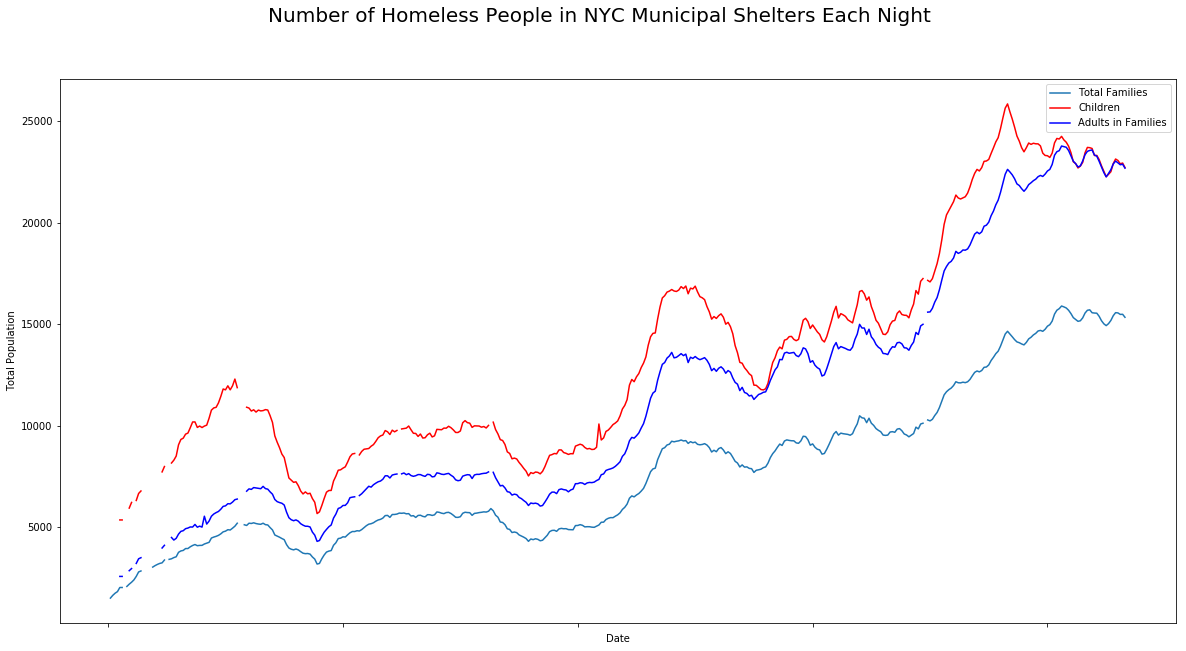

In [33]:
#pop = df['Total Population']
families = df['Total Families']
children = df['Children']
adults = df['Adults in Families']

#total = dict(zip(date, pop))
fam_pop = dict(zip(date, families)) # line 1, to be highlighted
child_pop = dict(zip(date,children)) # line 2
adult_pop = dict(zip(date, adults)) # line 3

#plt.plot(df['Date'], df['Total Population'])
x = date
#y1 = total
y2 = fam_pop
y3 = child_pop
y4 = adult_pop

fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Number of Homeless People in NYC Municipal Shelters Each Night', 
            fontsize = 20)

plt.ylabel('Total Population')

# gca stands for 'get current axis'
ax = plt.gca()

#df.plot(kind='line',x='Date',y='Total Population',ax=ax)
df.plot(kind='line',x='Date',y='Total Families',ax=ax)
df.plot(kind='line',x='Date',y='Children', color='red', ax=ax)
df.plot(kind='line',x='Date',y='Adults in Families', color='blue', ax=ax)
plt.legend()

#plt.savefig("fields-line.pdf", transparent = True)

plt.show()

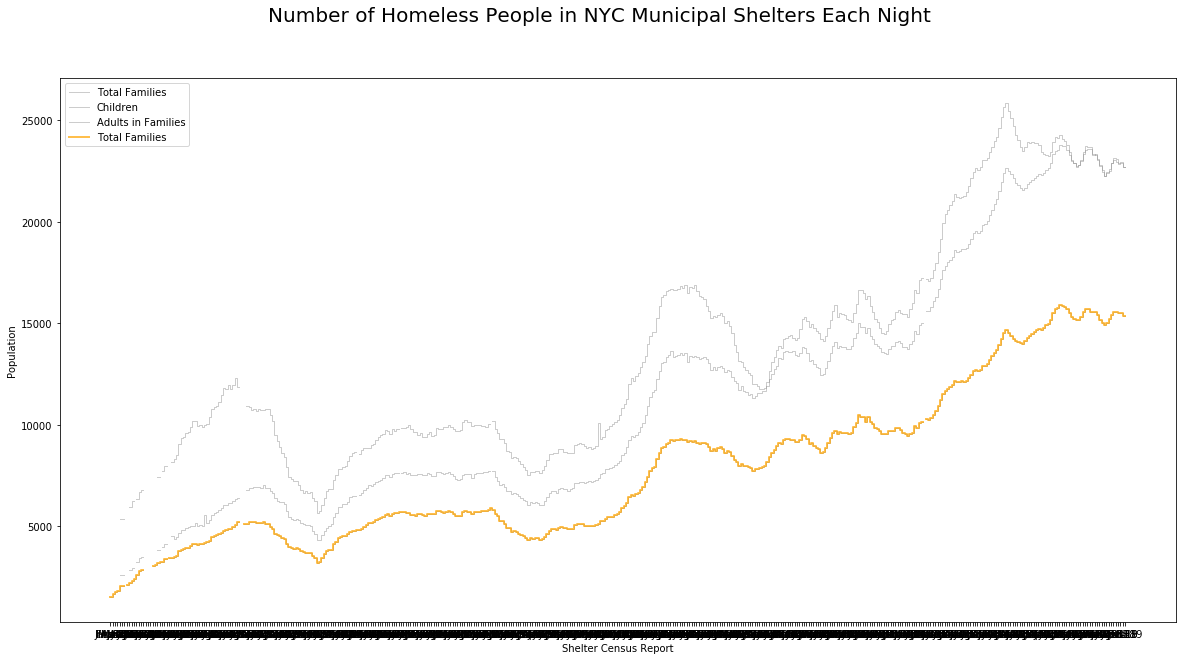

In [34]:
#step plot
fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Number of Homeless People in NYC Municipal Shelters Each Night', 
            fontsize = 20)
# multiple line plot
for column in df.drop('Date', axis=1):
    plt.step(df['Date'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)

    
plt.step(df['Date'], df['Total Families'], marker='', color='orange', linewidth=2, alpha=0.7)
plt.legend()
    
# need to fix repeat in legend

plt.xlabel("Shelter Census Report")
plt.ylabel("Population")

#plt.savefig("fields-step.pdf", transparent = True)

plt.show()


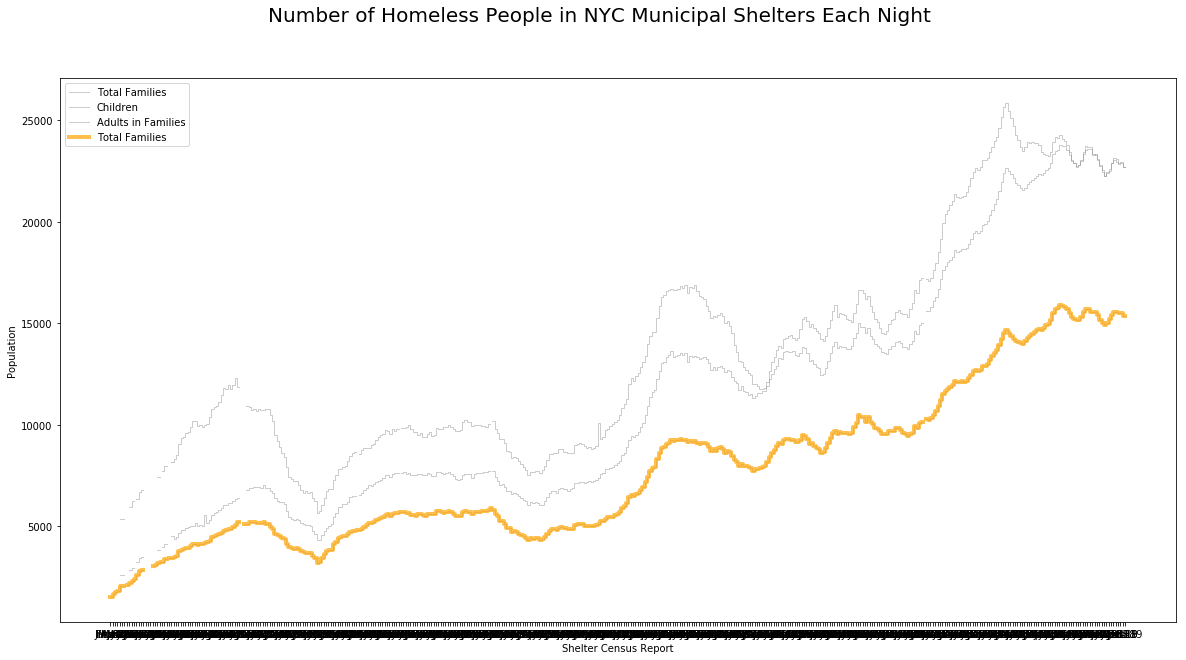

In [35]:
#step plot
fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Number of Homeless People in NYC Municipal Shelters Each Night', 
            fontsize = 20)
# multiple line plot
for column in df.drop('Date', axis=1):
    plt.step(df['Date'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)

    
plt.step(df['Date'], df['Total Families'], marker='', color='orange', linewidth=4, alpha=0.7)
plt.legend()
    
# need to fix repeat in legend

plt.xlabel("Shelter Census Report")
plt.ylabel("Population")

#plt.savefig("fields-step.pdf", transparent = True)

plt.show()


# Findings

Population of Homeless in shelters every night has grown tremendenously. Data started Jun-1983 at 12,830 people. Today 63,615+ homeless stay in shelters. This can be seen as a consequence of the housing crisis.